In [418]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



%matplotlib inline

In [419]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921300,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487655,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Handling Missing Values

In [420]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            9998 non-null   object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [421]:
data.gender.value_counts()

gender
Male      5456
Female    4542
Name: count, dtype: int64

In [422]:
new_data = data
data.gender.mode()

0    Male
Name: gender, dtype: object

In [423]:
new_data.gender.fillna('Male',inplace=True)

C:\Users\saiki\AppData\Local\Temp\ipykernel_20984\1188544313.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data.gender.fillna('Male',inplace=True)


In [424]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Feature Scaling

Standerdization

In [425]:
from sklearn.preprocessing import StandardScaler

In [426]:
new_data.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,40,2,125510.82,1,1,1,79084.10,0


In [427]:
new_data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921300,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487655,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [428]:
new_data_1 = pd.DataFrame(new_data,columns=['age','tenure'])
new_data_1.head()

,age,tenure
0,42,2
1,41,1
2,42,8
3,39,1
4,40,2


In [429]:
scaler = StandardScaler()
standerdized_df = scaler.fit_transform(new_data_1)
standerdized_df

array([[ 0.29356934, -1.04175968],
       [ 0.19821437, -1.38753759],
       [ 0.29356934,  1.03290776],
       ...,
       [-0.27856047,  0.68712986],
       [ 0.29356934, -0.69598177],
       [-1.04140022, -0.35020386]])

Normalization

In [430]:
from sklearn.preprocessing import MinMaxScaler

In [431]:
scaler_1 = MinMaxScaler()
nf_data = scaler_1.fit_transform(new_data_1)
nf_data

array([[0.32432432, 0.2       ],
       [0.31081081, 0.1       ],
       [0.32432432, 0.8       ],
       ...,
       [0.24324324, 0.7       ],
       [0.32432432, 0.3       ],
       [0.13513514, 0.4       ]])

In [432]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Visualization


Line graph


original customers according to the age

<Axes: xlabel='age'>

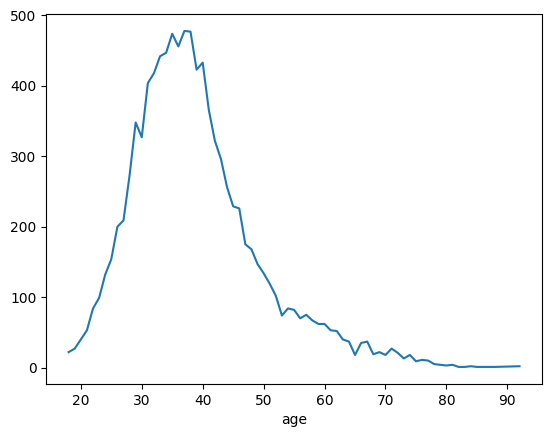

In [433]:
new_data['age'].value_counts().sort_index(ascending=True).plot()

From the line graph we get to know that Age is one of the main element to churn.

data according to the churn

In [434]:

new_data_2 = new_data.loc[new_data['churn'] == 1]


<Axes: xlabel='age'>

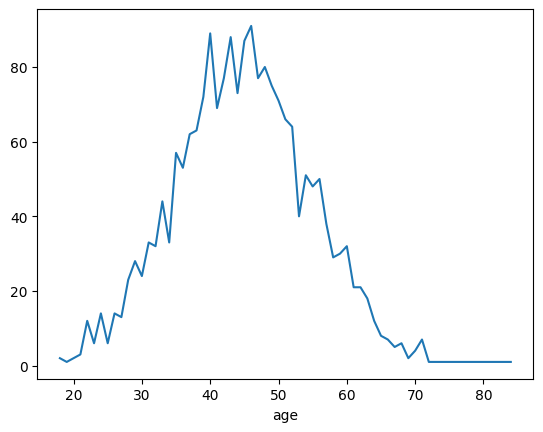

In [435]:
new_data_2['age'].value_counts().sort_index(ascending = True).plot()

From the line graph we got the the following insights

->  Customers from age between 40 to 50 are more likely to churn.


C:\Users\saiki\AppData\Local\Temp\ipykernel_20984\1769992773.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(new_data.age[new_data['churn']==0],color='Green', shade = True)
C:\Users\saiki\AppData\Local\Temp\ipykernel_20984\1769992773.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  tot = sns.kdeplot(new_data.age[new_data['churn']==1],color='Brown', shade = True)


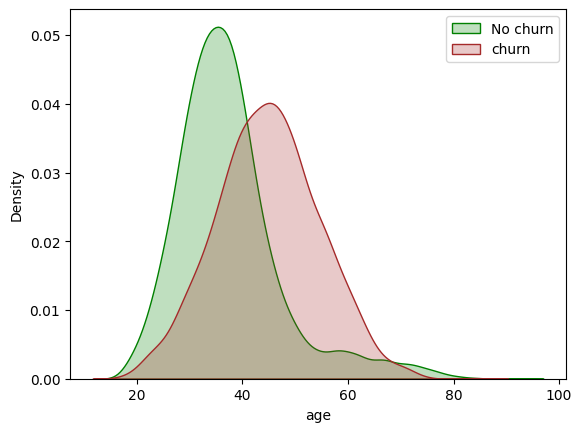

In [436]:
tot = sns.kdeplot(new_data.age[new_data['churn']==0],color='Green', shade = True)
tot = sns.kdeplot(new_data.age[new_data['churn']==1],color='Brown', shade = True)
tot.legend(['No churn', 'churn'])

As per the KDE plot we got insights like 
-> customers who are not churned(active) are mostly aged between approximately 28 to 40.
-> Customers aged between 40 to 54(mostly old aged) are most like to churn.

UNI variate Analysis

In [437]:
new_data.estimated_salary.describe()
bins_1 = (0,50000,100000,150000,200000)
labels_1 = ('0-50000','50001-100000','100001-150000','150001+')
new_data['estimated_salary_bins'] = pd.cut(new_data.estimated_salary,bins=bins_1,labels=labels_1)



In [438]:
bins = (0,20,40,60,100)
labels = ('0-20','21-40','41-60','60+')
new_data['age_bins'] = pd.cut(new_data['age'],bins=bins,labels = labels)

In [439]:
new_data.drop(columns=['customer_id'],axis=1,inplace=True)
pd.crosstab(new_data.gender,new_data.churn)

churn,0,1
gender,,
Female,3403,1139
Male,4560,898


In [440]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   credit_score           10000 non-null  int64   
 1   country                10000 non-null  object  
 2   gender                 10000 non-null  object  
 3   age                    10000 non-null  int64   
 4   tenure                 10000 non-null  int64   
 5   balance                10000 non-null  float64 
 6   products_number        10000 non-null  int64   
 7   credit_card            10000 non-null  int64   
 8   active_member          10000 non-null  int64   
 9   estimated_salary       10000 non-null  float64 
 10  churn                  10000 non-null  int64   
 11  estimated_salary_bins  10000 non-null  category
 12  age_bins               10000 non-null  category
dtypes: category(2), float64(2), int64(7), object(2)
memory usage: 879.4+ KB


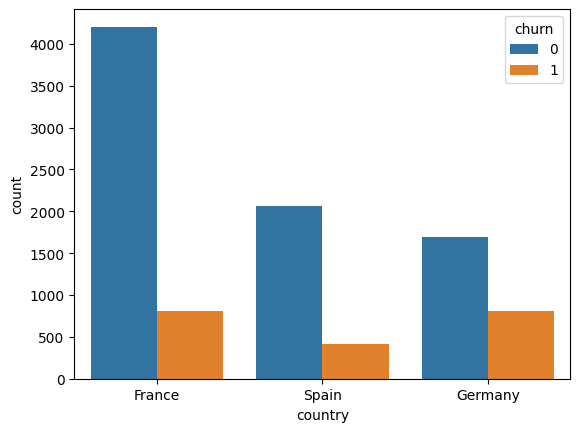

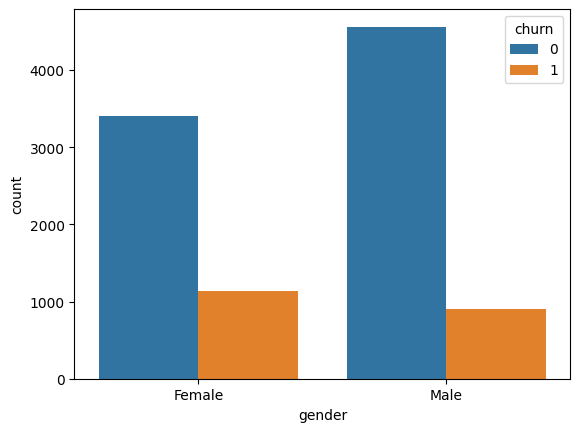

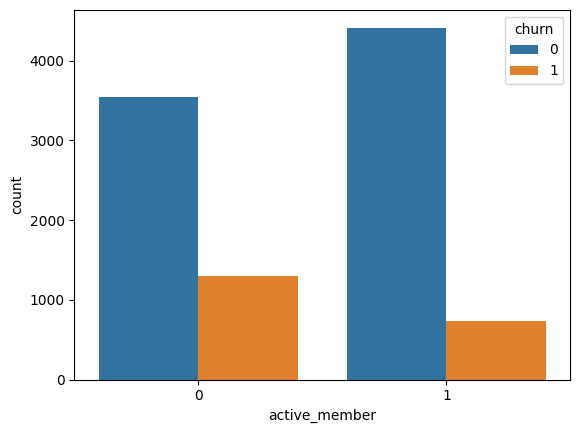

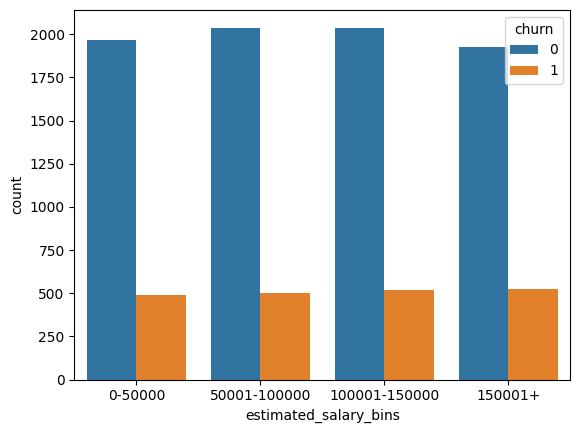

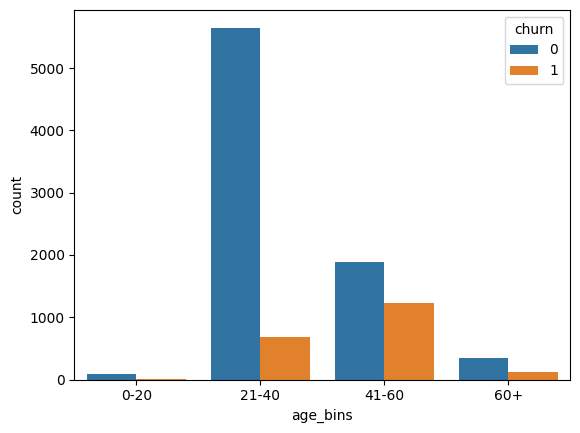

In [441]:
import seaborn as sb
for i, predictor in enumerate(new_data.drop(columns=['balance','products_number','credit_card','tenure','credit_score','churn','age','estimated_salary'])):
    plt.figure(i)
    
    sb.countplot(data=new_data,x=predictor,hue='churn')